# Setup

In [2]:
import pandas as pd
import altair as alt

from vega_datasets import data

# for the notebook only (not for JupyterLab) run this command once per session
alt.renderers.enable('notebook')

import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (15,6)

# Data

Here, we read data in using the `pd.read_csv()` function. The *path* to the file is specified within the function call. We then remove the row with index 0 to simplify column naming.

We *assign* the data in this CSV to the *variable* `survey` using the `=` operator. This way we can refer back to this object by its variable name throughout our analysis.

In [3]:
# read file into python
survey = pd.read_csv('https://raw.githubusercontent.com/ShanEllis/bootcamp/master/data/python_tutorial.csv')

# drop first row to have usable column names
survey.drop([0], inplace = True)

We can use the `head` method to get a sense for the information stored in the dataset.

In [4]:
survey.head()

,Q1,Q7,Q2,Q5,Q3,Q8,Q8_7_TEXT,Q4,Q9
1,I have limited programming experience.,Very helpful,NaN,NaN,20,R,NaN,Getting used to failures,"Coding experiments, analyzing data, optimizing..."
2,I'm a strong programmer.,Very helpful,NaN,NaN,17,"Python,JavaScript,Java,R",NaN,Think as a machine,Very helpful on my research
3,I am a competent programmer.,Very helpful,NaN,NaN,21,"Python,Java,R",NaN,When the code does not work and you dont know why,Very
4,I'm a strong programmer.,Very helpful,NaN,NaN,13,"Python,R",NaN,Dedication,Work opportunities
5,I'm a strong programmer.,Very helpful,NaN,NaN,21,"Python,JavaScript,R",NaN,Not knowing how to debug/read traceback/ google,Web development to share ideas and tools with ...


# Results 



## Background in Programming

To get a summary of the information stored in this dataset, we can generate a few plots. We'll use the `altair` package to do so.

If you're familiar with `pandas`, you've likely made plots like the following:

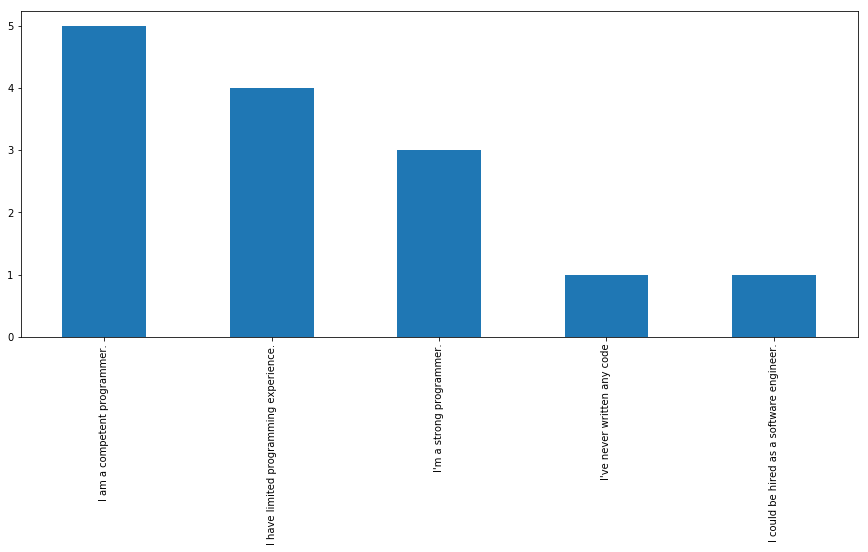

In [5]:
# use pandas to generate plot
survey['Q1'].value_counts().plot(kind = 'bar');

Altair implements the grammar of graphics in Python.

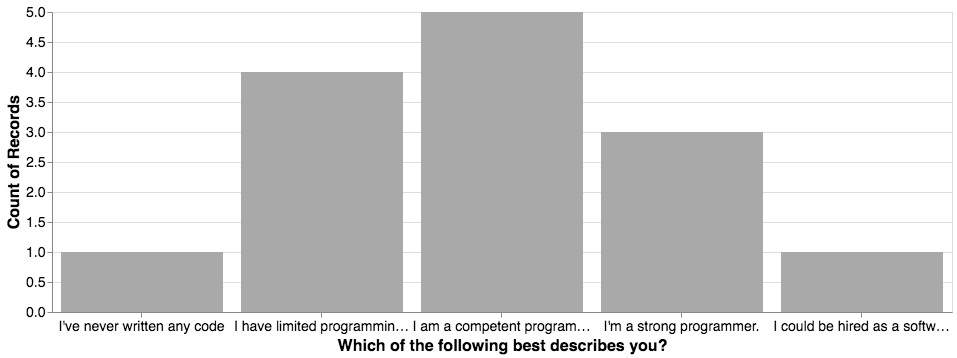

In [6]:
# generate plot with altair
base = alt.Chart(survey).mark_bar().configure_mark(
    color = 'darkgray'
).configure_axis(
    labelFontSize = 14,
    titleFontSize = 16,
    labelAngle = 0
).encode(
    y = 'count(Q1):Q'
).properties(
    width = 900)

# control the x-axis a bit more
base.encode(
    alt.X(field ='Q1', type='nominal',
          sort = ["I've never written any code", 
            "I have limited programming experience.", 
            "I am a competent programmer.",
            "I'm a strong programmer.",
            "I could be hired as a software engineer."], 
          axis = alt.Axis(title='Which of the following best describes you?')))

We see in this output that most students have some programming experience, but we have a diversity in responses, which is the cogsci way - lots of different and unique backgrounds! 

## Age At First Code

We'll use a similar approach here to plot a histogram of how old you were when you first learned to code.

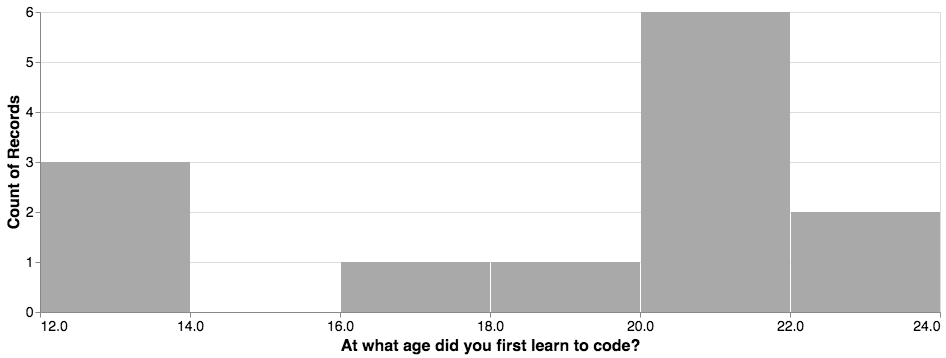

In [7]:
# generate histogram
alt.Chart(survey).mark_bar().encode(
    alt.X("Q3:Q", 
          bin = True, 
          axis = alt.Axis(title='At what age did you first learn to code?')),
    y = 'count()'
).configure_mark(
    color ='darkgray'
).configure_axis(
    labelFontSize = 14, 
    titleFontSize = 16
).properties(
    width = 900)

## Programming Language

Here, it's a little bit more work to plot the information we want. People can be comfortable (and often are) programming in more than one language, so we have to parse the responses. We do this below by defining a function and then applying that across the languages for which we want to count responses. These results are then plotted.


In [8]:
# specify languages
list_languages  = ['Python','R','JavaScript','Java','C\+\+','Java', 'Matlab']

# count number of times each word appears
mydict = {}
for word in list_languages:
    mydict[word] = survey['Q8'].str.contains(word).sum()
    
# wrangle the dataframe
df = pd.DataFrame.from_dict(mydict, orient = "index")
df.loc["Java",0] = (df.loc["Java",0] - 2)
df.columns = ["Count"]
df.reset_index(inplace = True)

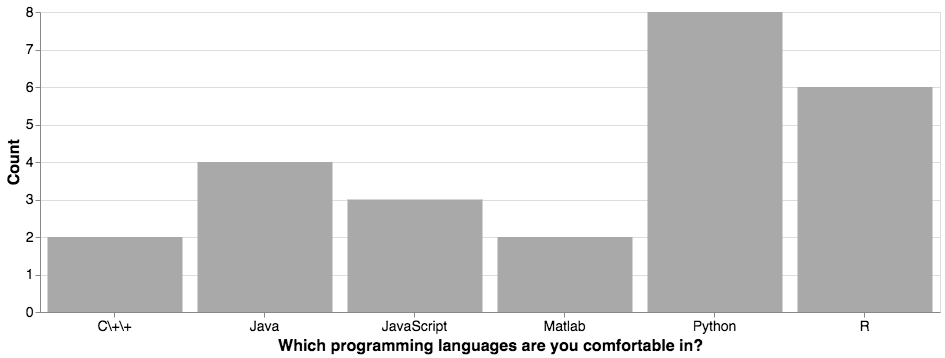

In [9]:
# create the plot
alt.Chart(df).mark_bar().configure_mark(
    color='darkgray'
).configure_axis(
    labelFontSize = 14,
    titleFontSize = 16,
    labelAngle = 0
).encode(
    alt.X(field = 'index', type = "nominal", 
          axis = alt.Axis(title='Which programming languages are you comfortable in?')),
    y = 'Count'
).properties(
    width = 900)